In [43]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [6]:
iris = load_iris()
X = iris['data']

In [7]:
def distance(x:np.array, y: np.array, dist='minkowski', p=2):
    '''Calculate the distance between two points'''
    return sum(abs(x-y)**(p))**(1/p)

In [46]:
# TODO: Make these vectorized

def J(X, mu, ids):
    '''Calculate J index'''
    n = X.shape[0]
    res = 0
    i = 0
    for i in range(n):
        res += distance(X[i], mu[ids[i]])**2
        i += 1
        
    return(res/n)

def Q(X, mu, ids):
    '''Calculate Q index'''
    n = dict(zip(*np.unique(ids, return_counts=True)))
    
    res = 0
    i = 0
    for i in range(X.shape[0]):
        j = ids[i]
        res += distance(X[i], mu[j])/n[j]
        i += 1
        
    return(res)

In [52]:
max_K = 20
K_range = range(1, max_K+1)
scores = {}
scores['J'] = [0]*max_K
scores['Q'] = [0]*max_K

i = 0
for k in K_range:
            
    model = KMeans(n_clusters=k)
    model.fit(X)
    cluster_ids, centroids = model.predict(X), model.cluster_centers_

    scores['J'][i] = J(X, centroids, cluster_ids)
    scores['Q'][i] = Q(X, centroids, cluster_ids)
    
    i += 1

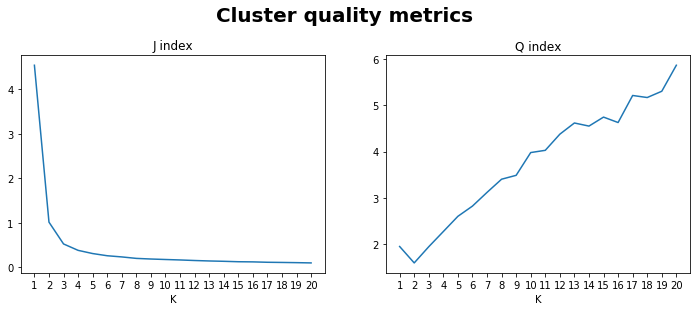

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

ax1.plot(range(1, max_K+1), scores['J'])
ax1.set_xlabel('K')
ax1.set_xticks(K_range)
ax1.set_title('J index')

ax2.plot(range(1, max_K+1), scores['Q'])
ax2.set_title('Q index')
ax2.set_xlabel('K')


fig.suptitle('Cluster quality metrics', fontsize=20, fontweight='bold', y=1.05)
plt.savefig('KMeans_Cluster_quality.pdf', dpi=400, bbox_inches='tight')